___
# PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
___

## Import Libraries

In [14]:
# Import DS environment
import sys; import os; sys.path.append(os.path.expanduser('~/Google Drive/my/projects/python/'))
from ds_setup import *
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

Setting up test data to look at


In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

## Standardize

PCA is effected by scale so you need to scale the features in your data before applying PCA

In [16]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

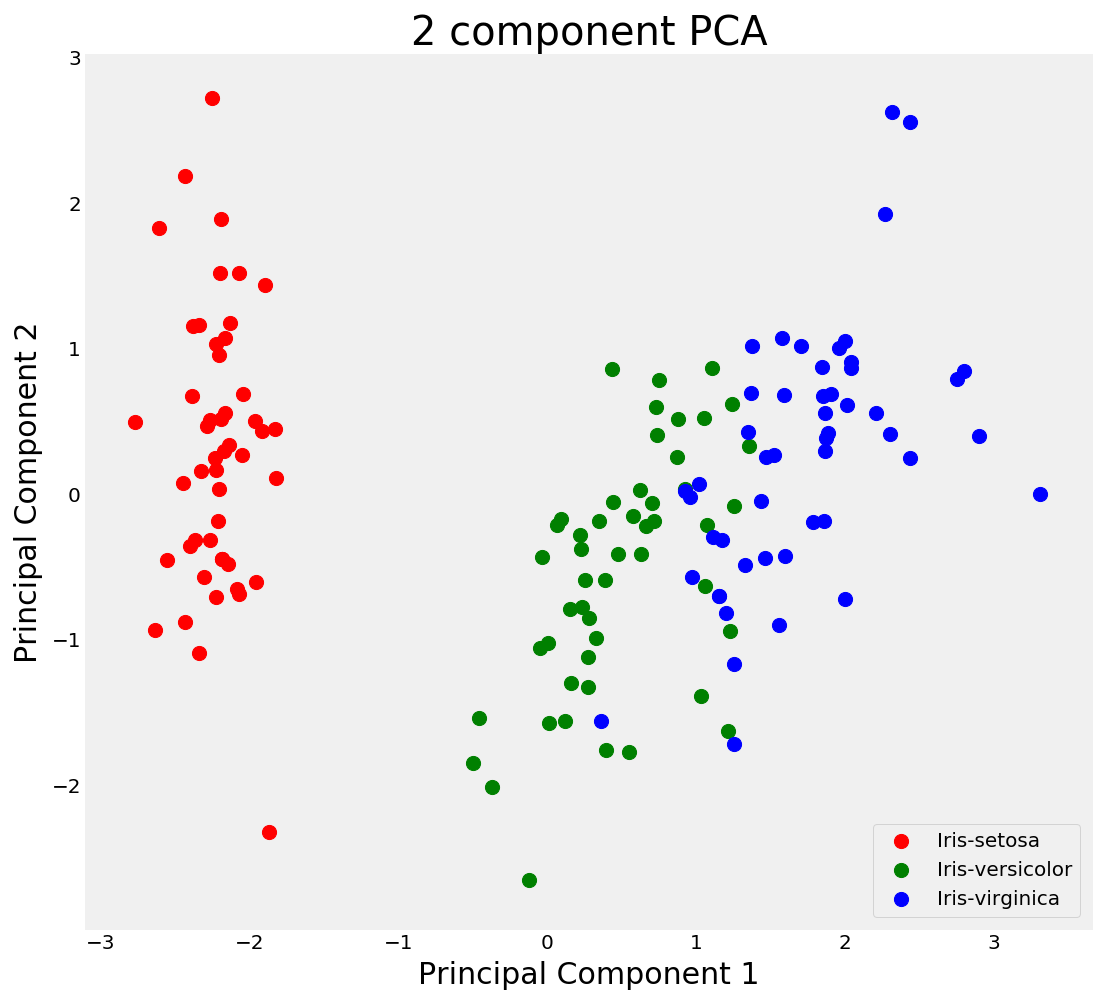

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Scores

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [47]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [48]:
pca.explained_variance_ratio_.flatten()

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [49]:
np.sum( pca.explained_variance_ratio_[:2] ) # extracts the top 2 

0.9580097536148199

In [50]:
print(pca.singular_values_)

[20.89551896 11.75513248  4.7013819   1.75816839]


## Choosing the number of components

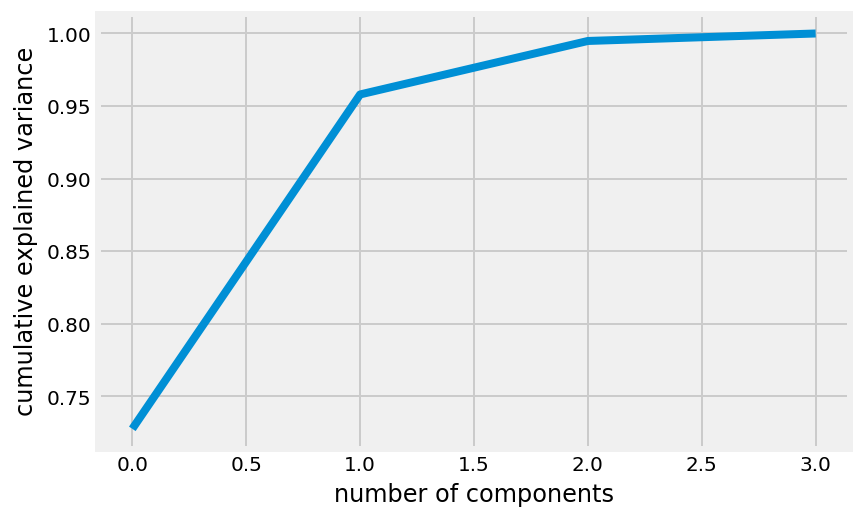

In [64]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Choosing the number of components (v2)

Choose the components that explain 95% of variation

In [79]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95).fit(x) # that explains 95% of the model
pca.fit(x)
pca.n_components_ 

2